# AccelerateAI - Data Science Bootcamp

## EDA - Retail Sales Analysis

## Context

The growth of retail supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. We will use this to explore and provide answers to some business questions.

Feature information for the Retail Supermarket Sales:

* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in dollar amount
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Import Libraries

In [1]:
import numpy as np
from numpy.random import seed, randint
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# A jupyter notebook specific command that let’s you see the plots in the notbook itself.
%matplotlib inline 

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration

In [2]:
df = pd.read_csv("c:/Users/mishr/Desktop/Notebooks/data/Retail_Sales.csv")

df.shape

(1000, 17)

In [3]:
df.sample(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
642,794-32-2436,B,Perth,Member,Male,Electronic accessories,55.67,2,5.5670,116.9070,3/27/2019,15:08,Ewallet,111.34,4.761905,5.5670,6.0
918,777-67-2495,B,Perth,Normal,Male,Home and lifestyle,68.97,3,10.3455,217.2555,2/22/2019,11:26,Ewallet,206.91,4.761905,10.3455,8.7
112,227-78-1148,B,Perth,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,509.88,4.761905,25.4940,8.4
974,744-82-9138,C,Hobart,Normal,Male,Fashion accessories,86.13,2,8.6130,180.8730,02-07-2019,17:59,Cash,172.26,4.761905,8.6130,8.2


In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [6]:
# Change the date feature to "Date"

df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['weekday'] = df['Date'].dt.day_name()

In [8]:
df.sample(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
897,409-49-6995,C,Hobart,Member,Female,Food and beverages,47.27,6,14.1810,297.8010,2019-02-05,10:17,Cash,283.62,4.761905,14.1810,8.8,Tuesday
511,209-61-0206,A,Adelaide,Normal,Female,Home and lifestyle,42.91,5,10.7275,225.2775,2019-01-05,17:29,Ewallet,214.55,4.761905,10.7275,6.1,Saturday
15,299-46-1805,B,Perth,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,2019-01-15,16:19,Cash,562.32,4.761905,28.1160,4.5,Tuesday
837,670-71-7306,B,Perth,Normal,Male,Sports and travel,44.63,6,13.3890,281.1690,2019-01-02,20:08,Credit card,267.78,4.761905,13.3890,5.1,Wednesday


In [9]:
# Set the "Date" as the index
df.set_index('Date', inplace=True)

In [10]:
df.sample(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-01-07,889-04-9723,B,Perth,Member,Female,Food and beverages,89.14,4,17.8280,374.3880,12:20,Credit card,356.56,4.761905,17.8280,7.8,Monday
2019-02-19,384-59-6655,A,Adelaide,Member,Female,Food and beverages,98.66,9,44.3970,932.3370,15:07,Cash,887.94,4.761905,44.3970,8.4,Tuesday
2019-01-28,593-65-1552,C,Hobart,Normal,Female,Home and lifestyle,69.81,4,13.9620,293.2020,20:50,Credit card,279.24,4.761905,13.9620,5.9,Monday
2019-03-06,783-09-1637,B,Perth,Normal,Female,Sports and travel,67.43,5,16.8575,354.0075,18:13,Ewallet,337.15,4.761905,16.8575,6.3,Wednesday


## 2. Univariate Analysis

### 2.1 (BQ) What does the customer rating look like and is it skewed?

In [11]:
df.sample(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-03-30,364-34-2972,C,Hobart,Member,Male,Electronic accessories,96.82,3,14.5230,304.9830,20:37,Cash,290.46,4.761905,14.5230,6.7,Saturday
2019-02-17,420-11-4919,C,Hobart,Member,Female,Food and beverages,71.39,5,17.8475,374.7975,19:57,Credit card,356.95,4.761905,17.8475,5.5,Sunday
2019-03-20,514-37-2845,B,Perth,Normal,Male,Fashion accessories,99.25,2,9.9250,208.4250,13:02,Cash,198.50,4.761905,9.9250,9.0,Wednesday
2019-01-14,592-34-6155,C,Hobart,Normal,Male,Food and beverages,31.77,4,6.3540,133.4340,14:43,Ewallet,127.08,4.761905,6.3540,6.2,Monday


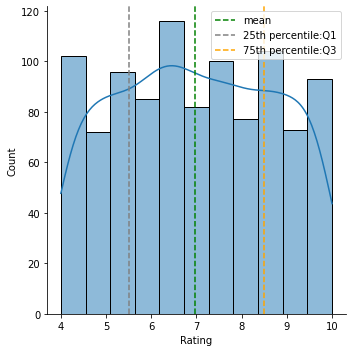

In [12]:
sns.displot(df['Rating'], kde=True)
plt.axvline(x=np.mean(df['Rating']), c='green', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='grey', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3')
plt.legend()
plt.show()

**Interpretation:**

The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. We can plot the mean and the percentiles to show this. The green dotted line is the mean and the grey and orange lines indicate the 25th and 75th percentiles respectively.The mean rating is ~7 across products.

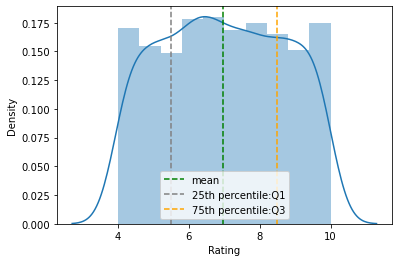

In [13]:
sns.distplot(df['Rating'], kde=True)
plt.axvline(x=np.mean(df['Rating']), c='green', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='grey', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3')
plt.legend()
plt.show()

### 2.2 (BQ) Is there any difference in aggregate sales across branches?

Here we would like to know if there is any difference in aggregate sales across the branches.This can be accomplished by a count plot.

A    340
B    332
C    328
Name: Branch, dtype: int64

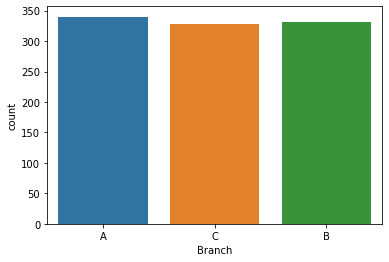

In [14]:
sns.countplot(df['Branch'])
df['Branch'].value_counts()

**Interpretation:**

There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches.

### 2.3 (BQ) Which is the most pouplar payment method used by customers?

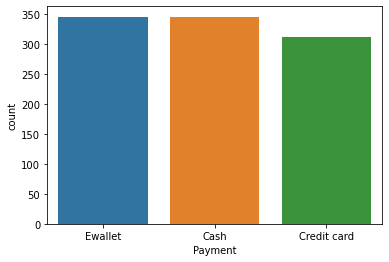

In [15]:
sns.countplot(df['Payment'])

plt.show()

**Interpretation:**

The most popular payment method is in-fact E-wallet and not credit cards.Cash payment is also popular.

## 3. Bivariate Analysis

### 3.1 (BQ) Does gross income affect the ratings that the customers provide?

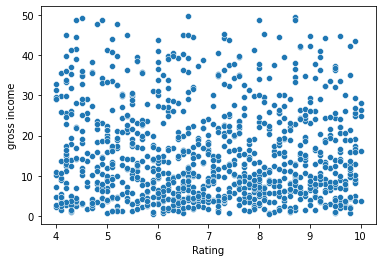

In [16]:
sns.scatterplot(df['Rating'], df['gross income'])
plt.show()

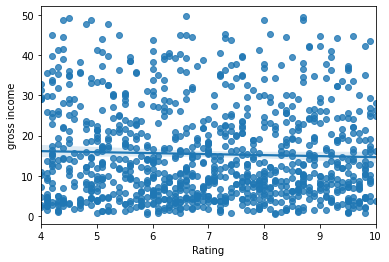

In [17]:
sns.regplot(df['Rating'], df['gross income'])
plt.show()

**Interpretation:**

As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between gross income of a customer and his/her rating.

### 3.2 (BQ) Which branch is the most profitable?

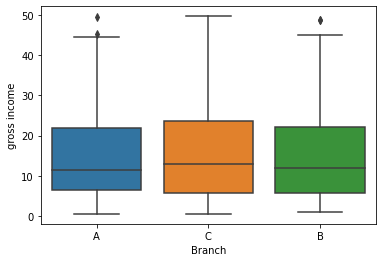

In [18]:
sns.boxplot(x=df['Branch'], y=df['gross income'])
plt.show()

**Interpretation:**

There is not much difference in gross income by branches at an average level. 
* Branch C has a slightly higher income than A or B.
* As observed earlier,though branch A has slightly higher sales than the rest i.e B probably, however here in the chart A and B looks almost similar.
* Branch C i.e. Hobart is the most profitable branch in terms of gross income.

### 3.3 (BQ) Is there any relationship between Gender and Gross income?

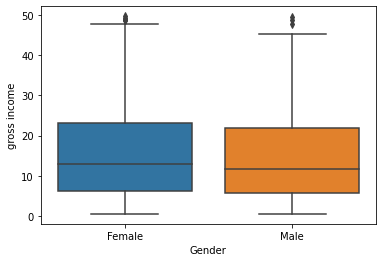

In [19]:
sns.boxplot(x=df['Gender'], y=df['gross income'])
plt.show()

**Interpretation:**

Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.

### 3.4 (BQ) Is there any time trend in gross income?

In [20]:
df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-03-10,668-90-8900,A,Adelaide,Normal,Female,Home and lifestyle,93.69,7,32.7915,688.6215,18:44,Credit card,655.83,4.761905,32.7915,4.5,Sunday
2019-01-16,677-11-0152,C,Hobart,Normal,Female,Food and beverages,93.26,9,41.9670,881.3070,18:08,Cash,839.34,4.761905,41.9670,8.8,Wednesday
2019-02-27,263-12-5321,A,Adelaide,Member,Male,Electronic accessories,92.60,7,32.4100,680.6100,12:52,Credit card,648.20,4.761905,32.4100,9.3,Wednesday


There are multiple dates per customers, so we have to ```summarize``` the data to find the time trend of gross income. We will use ```date``` as the index for this and for summarization we will use ```mean value of the variables```.

In [21]:
df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


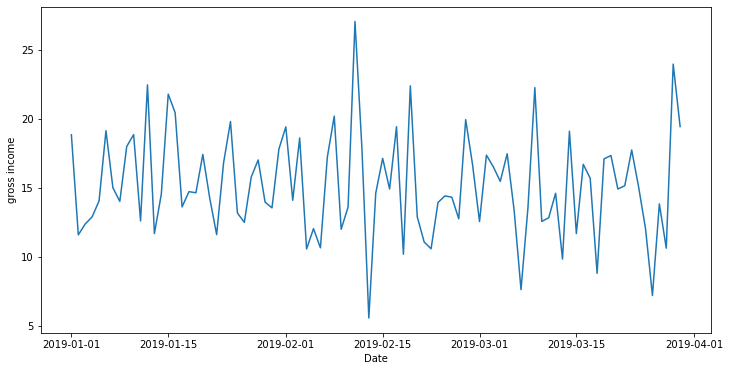

In [22]:
# There are multiple dates per customers, so we have to summarize the data to find the time trend of gross income. 
# We will use ‘date’ as the index for this and for summarization we will use mean value of the variables.

plt.figure(figsize=(12,6))
ax = sns.lineplot(x= df.groupby(df.index).mean().index, y = df.groupby(df.index).mean()['gross income'])

plt.show()

### 3.5 (BQ) Which product line generates most income?

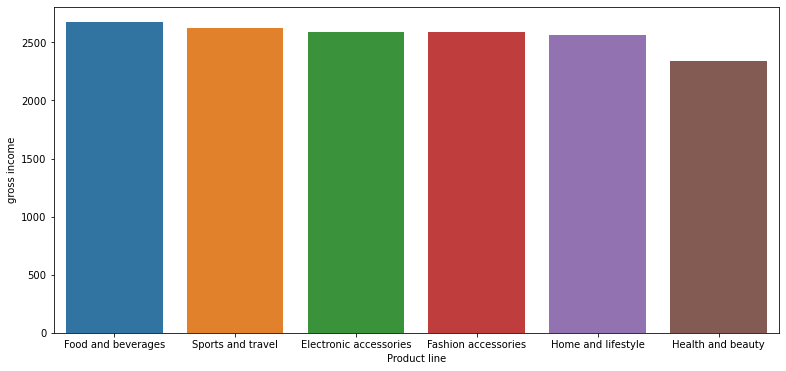

In [23]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x='Product line', y='gross income', data=cat)
plt.show()

## 4. Multi-variate Analysis

### 4.1 (BQ) Perform Individual and Pairwise Correlations. What do they infer?

In [24]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

In [25]:
np.round(df.corr(),3)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000,0.011,0.634,0.634,0.634,-0.0,0.634,-0.009
Quantity,0.011,1.000,0.706,0.706,0.706,-0.0,0.706,-0.016
Tax 5%,0.634,0.706,1.000,1.000,1.000,0.0,1.000,-0.036
Total,0.634,0.706,1.000,1.000,1.000,0.0,1.000,-0.036
cogs,0.634,0.706,1.000,1.000,1.000,0.0,1.000,-0.036
gross margin percentage,-0.000,-0.000,0.000,0.000,0.000,1.0,0.000,0.000
gross income,0.634,0.706,1.000,1.000,1.000,0.0,1.000,-0.036
Rating,-0.009,-0.016,-0.036,-0.036,-0.036,0.0,-0.036,1.000


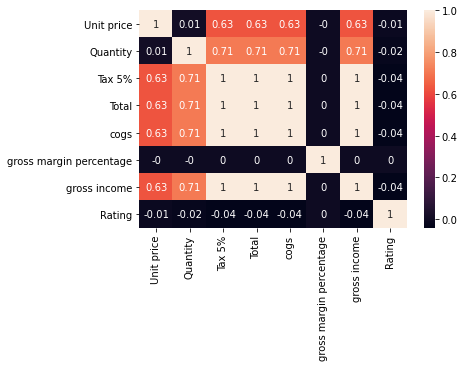

In [26]:
sns.heatmap(np.round(df.corr(),2), annot=True)

plt.show()

**Interpretation:**

The unit price is positively correlated to cogs with 63% correlation. Another interesting observation is that ‘Ratings’ hardly has any correlation with any other variables.
As is obvious, Quantity and gross income has very high correlation of 71%.

### 4.2 (BQ) What is the spending patterns by Gender and in which category do they spend a lot?

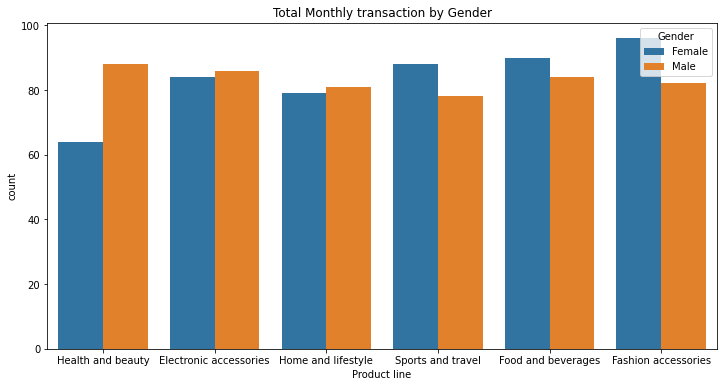

In [27]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Product line'], hue = df.Gender)

plt.show()

**Interpretation:**

* Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. 
* Females also spend more on 'Food and beverages' followed by 'Sports and travel' next.

### 4.3 (BQ) How many products are bought by customers?

Using distribution plot and heat map we can explore the number of products/quantities that most customers buy.

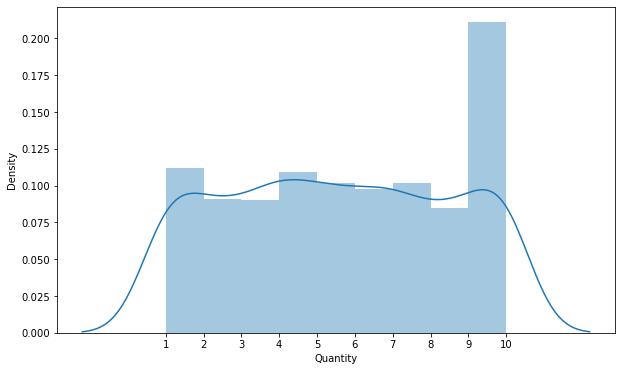

In [28]:
bin_no_of_products = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (10,6))
sns.distplot(df['Quantity'], kde=True)
plt.xticks(bin_no_of_products)
plt.show()

**Interpretation:**

Most customers bought 10 quantities of product.

### 4.4 (BQ) Which day of the week has maximum sales?

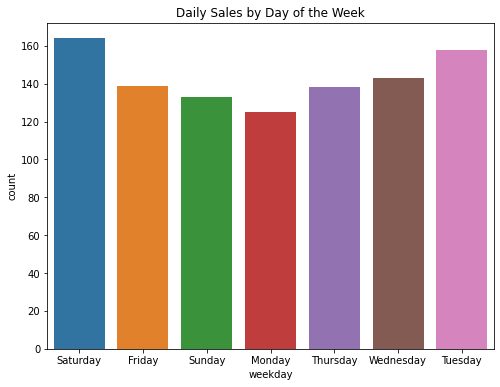

In [29]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')

sns.countplot(df['weekday'])

plt.show()

**Interpretation:**

Sales is highest on Saturdays probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales, probably because it is start of the working week.

### 4.5 (BQ) Which hour of the day is the busiest?

In [30]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

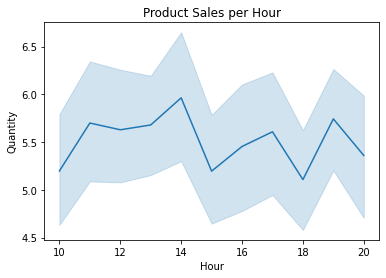

In [31]:
sns.lineplot(x="Hour",y='Quantity',data=df).set_title("Product Sales per Hour")
plt.show()

**Interpretation:**

Peak product sale is observed around 14:00 i.e 2pm of the day. Hence, sales is typically higher in the afternoon.

### 4.6 (BQ) You are appointed as the store manager. How do you suggest which product line should the supermarket focus on?

As a store manager, let's first look at "Rating of products".

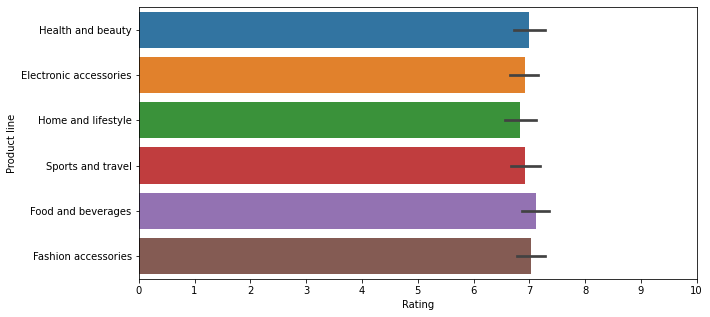

In [32]:
bin_no_of_products = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (10,5))

sns.barplot(y = df['Product line'], x = df['Rating'])

plt.xticks(bin_no_of_products)
plt.show()

Then, let's look at "Quantity purchased by Product".

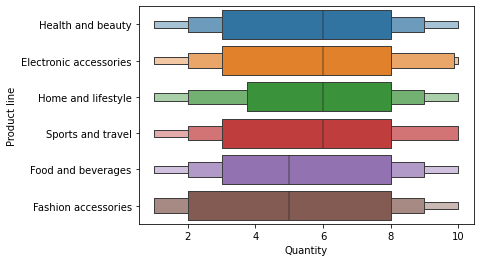

In [33]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data = df )
plt.show()

**Interpretation:**

Even though the rating for ‘fashion accessories’ and ‘food and beverages’ are high, however the quantity purchased are low. Therefore, supply for these products need to be increased.

### 4.7 (BQ) You have to take a decision as store manager. Which city should be chosen for expansion and which products should it focus on? Explain.

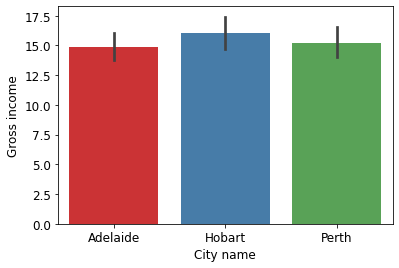

In [34]:
plt.figure(figsize=(6,4))

sns.barplot(df['City'],df['gross income'],palette='Set1')

plt.xlabel('City name',fontsize='12')
plt.xticks(fontsize='12')
plt.ylabel('Gross income',fontsize='12')
plt.yticks(fontsize='12')

plt.show()

We can also explore to use ANOVA to test between 3 groups.

In [35]:
import scipy.stats as stats

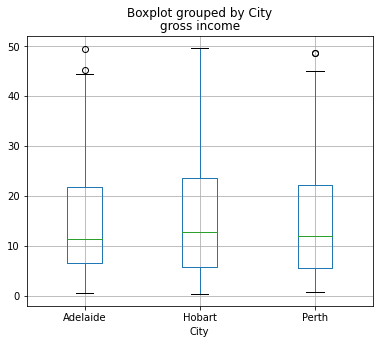

In [36]:
df.boxplot('gross income', by='City', figsize=(6,5))
plt.show()

In [37]:
city_A = df[df['City'] == 'Adelaide']
city_B = df[df['City'] == 'Hobart']
city_C = df[df['City'] == 'Perth']

In [38]:
stats.f_oneway(city_A['gross income'], city_B['gross income'], city_C['gross income'])

F_onewayResult(statistic=0.8845828327760514, pvalue=0.413210174367147)

**Interpretation:**

Since Hobart is the most profitable city, you as a store manager should plan to expand business for this city and have an expansion plan laid out based on this insight.

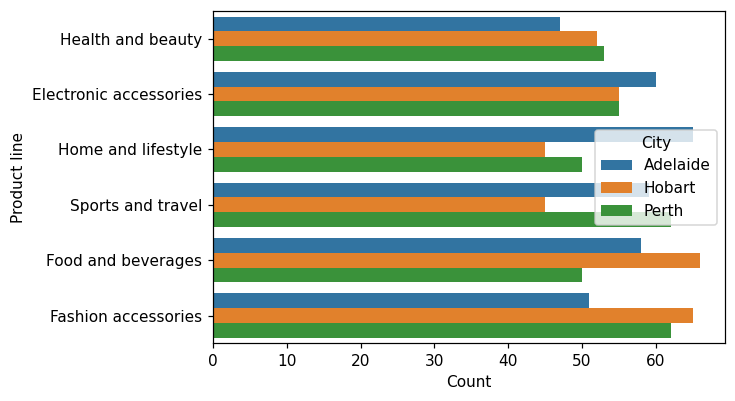

In [39]:
plt.figure(dpi=110)
sns.countplot(y='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.show()

**Interpretation:**

* "Food and beverages" and "Fashion accessories" are the most sold product in Hobart and these products should be focused on for expansion along with "Electronic accessories". 
* There should also be next priority to have expansion plan for Perth for "Sports and Travel" and "Fashion accessories".

### Product Line by wordcloud

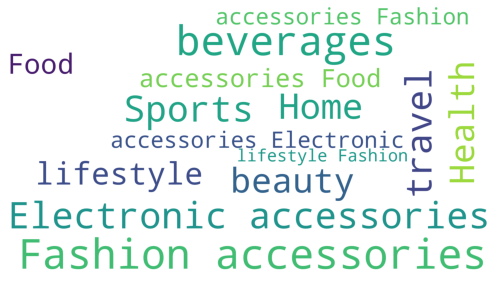

In [40]:
plt.subplots(figsize=(11,5))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

## Summary

We used uni-variate, bi-variate and multi-variate analysis to perform basic EDA on the **Retail Sales** information.

Other Books / References: https://www.google.co.in/books/edition/Hands_On_Exploratory_Data_Analysis_with/QcHZDwAAQBAJ?hl=en&gbpv=1&dq=exploratory+data+analysis&printsec=frontcover

We are at the end of the notebook!!